In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from readData import *
from nearNeighbors import *
from localBKG import *
from scipy import stats
from bestBkg import *
from astropy import stats
import healpy as hp
from nearNeighborsHEALPix import *
from localBKG_and_interlopersHEALPix import *
import healpy as hpy
import mpl_scatter_density
from makeCutoutTableFunc import *

In [2]:
# Reads in data files for use in readData.py

hdulist = fits.open('/Users/mtownsend/anaconda/Data/survey-dr7-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
hdulist2 = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
hdulist3 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr7.fits') # this is one sweep file of the DECaLS data
hdulist4 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr7.fits') # this is one sweep file of the DECaLS data

# hdulist = fits.open('/Users/mindy/Research/Data/lrgProjectData/survey-dr5-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
# hdulist2 = fits.open('/Users/mindy/Research/Data/lrgProjectData/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
# hdulist3 = fits.open('/Users/mindy/Research/Data/lrgProjectData/sweep-240p005-250p010.fits') # this is one sweep file of the DECaLS data


SpecObj_data = hdulist[1].data
SDSS_data = hdulist2[1].data
DECaLS_data1 = hdulist3[1].data
DECaLS_data2 = hdulist4[1].data

id_ALL1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gdepth_LRG1, rdepth_LRG1, zdepth_LRG1, gdepth_BKG1, rdepth_BKG1, zdepth_BKG1, gobs_LRG1, robs_LRG1, zobs_LRG1, gobs_BKG1, robs_BKG1, zobs_BKG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1, w1flux_LRG1, w2flux_LRG1, w3flux_LRG1, w4flux_LRG1, w1flux_BKG1, w2flux_BKG1, w3flux_BKG1, w4flux_BKG1, plate_LRG1, tile_LRG1, specobjid_LRG1, objid_LRG1, brickid_LRG1 = readData(SpecObj_data, SDSS_data, DECaLS_data1)

id_ALL2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gdepth_LRG2, rdepth_LRG2, zdepth_LRG2, gdepth_BKG2, rdepth_BKG2, zdepth_BKG2, gobs_LRG2, robs_LRG2, zobs_LRG2, gobs_BKG2, robs_BKG2, zobs_BKG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2, w1flux_LRG2, w2flux_LRG2, w3flux_LRG2, w4flux_LRG2, w1flux_BKG2, w2flux_BKG2, w3flux_BKG2, w4flux_BKG2, plate_LRG2, tile_LRG2, specobjid_LRG2, objid_LRG2, brickid_LRG2 = readData(SpecObj_data, SDSS_data, DECaLS_data2)


# ra = np.concatenate([ra_LRG1, ra_LRG2, ra_BKG1, ra_BKG2])
# dec = np.concatenate([dec_LRG1, dec_LRG2, dec_BKG1, dec_BKG2])
# z_LRG = np.concatenate([z_LRG1, z_LRG2])
# gmag = np.concatenate([gmag_LRG1, gmag_LRG2, gmag_BKG1, gmag_BKG2])
# rmag = np.concatenate([rmag_LRG1, rmag_LRG2, rmag_BKG1, rmag_BKG2])
# zmag = np.concatenate([zmag_LRG1, zmag_LRG2, zmag_BKG1, zmag_BKG2])
# color = np.concatenate([color_LRG1, color_LRG2, color_BKG1, color_BKG2])

# id_ALL1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, rmag_BKG1, gmag_BKG1, zmag_BKG1, grcolor_BKG1, rzcolor_BKG1, gzcolor_BKG1, rmag_LRG1, gmag_LRG1, zmag_LRG1, grcolor_LRG1, rzcolor_LRG1, gzcolor_LRG1, z_LRG1, gdepth_LRG1, rdepth_LRG1, zdepth_LRG1, gdepth_BKG1, rdepth_BKG1, zdepth_BKG1, gobs_LRG1, robs_LRG1, zobs_LRG1, gobs_BKG1, robs_BKG1, zobs_BKG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1 = readData(SpecObj_data, SDSS_data, DECaLS_data1)
# id_ALL2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, rmag_BKG2, gmag_BKG2, zmag_BKG2, grcolor_BKG2, rzcolor_BKG2, gzcolor_BKG2, rmag_LRG2, gmag_LRG2, zmag_LRG2, grcolor_LRG2, rzcolor_LRG2, gzcolor_LRG2, z_LRG2, gdepth_LRG2, rdepth_LRG2, zdepth_LRG2, gdepth_BKG2, rdepth_BKG2, zdepth_BKG2, gobs_LRG2, robs_LRG2, zobs_LRG2, gobs_BKG2, robs_BKG2, zobs_BKG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2 = readData(SpecObj_data, SDSS_data, DECaLS_data2)

# ra_LRG = np.concatenate([ra_LRG1, ra_LRG2])
# ra_BKG = np.concatenate([ra_BKG1, ra_BKG2])
# dec_LRG = np.concatenate([dec_LRG1, dec_LRG2])
# dec_BKG = np.concatenate([dec_BKG1, dec_BKG2])
# z_LRG = np.concatenate([z_LRG1, z_LRG2])
# gmag_LRG = np.concatenate([gmag_LRG1, gmag_LRG2])
# gmag_BKG = np.concatenate([gmag_BKG1, gmag_BKG2])
# rmag_LRG = np.concatenate([rmag_LRG1, rmag_LRG2])
# rmag_BKG = np.concatenate([rmag_BKG1, rmag_BKG2])
# zmag_LRG = np.concatenate([zmag_LRG1, zmag_LRG2])
# zmag_BKG = np.concatenate([zmag_BKG1, zmag_BKG2])
# color_LRG = np.concatenate([color_LRG1, color_LRG2])
# color_BKG = np.concatenate([color_BKG1, color_BKG2])
# rzcolor_LRG = np.concatenate([rzcolor_LRG1, rzcolor_LRG2])
# rzcolor_BKG = np.concatenate([rzcolor_BKG1, rzcolor_BKG2])
# gzcolor_LRG = np.concatenate([gzcolor_LRG1, gzcolor_LRG2])
# gzcolor_BKG = np.concatenate([gzcolor_BKG1, gzcolor_BKG2])

print("end readdata")

length of sdss array:  4851200
length of lrg only array: 1406221
length of DECaLS targets in brick:  5182673
length of id_ALL:  5182673
<class 'numpy.ndarray'>
length of id_MATCHED with LRG_cut (id_LRG): 2012
length of idcut: 5182673
length of idcut = 1 (is an LRG in DECaLS-only file): 1524
length of idcut = 0 (is not an LRG in DECaLS-only file): 5181149
length of z_lrg: 1524
length of sdss array:  4851200
length of lrg only array: 1406221
length of DECaLS targets in brick:  4008392
length of id_ALL:  4008392
<class 'numpy.ndarray'>
length of id_MATCHED with LRG_cut (id_LRG): 2012
length of idcut: 4008392
length of idcut = 1 (is an LRG in DECaLS-only file): 488
length of idcut = 0 (is not an LRG in DECaLS-only file): 4007904
length of z_lrg: 488
end readdata


In [ ]:
# print(SDSS_data.field('PLATE'))
# print(SDSS_data.field('TILE'))
# id_LRG1 = idcut1[np.where(idcut1 == 1)]
# id_LRG2 = idcut2[np.where(idcut2 == 1)]

print(len(objid_LRG1))
print(len(objid_LRG2))
print(len(brickid_LRG1))
print(len(brickid_LRG2))
print(len(specobjid_LRG1))
print(len(specobjid_LRG2))

In [3]:
# print(plate_LRG1)
# print(plate_LRG2)
# print(tile_LRG1)
# print(tile_LRG2)

specobjid = np.concatenate([specobjid_LRG1, specobjid_LRG2])
objid_LRG = np.concatenate([objid_LRG1, objid_LRG2])
brickid_LRG = np.concatenate([brickid_LRG1, brickid_LRG2])

# calculate LRG magnitudes

gmag_LRG1 = 22.5 - 2.5 * np.log10(gflux_LRG1)
gmag_LRG2 = 22.5 - 2.5 * np.log10(gflux_LRG2)
rmag_LRG1 = 22.5 - 2.5 * np.log10(rflux_LRG1)
rmag_LRG2 = 22.5 - 2.5 * np.log10(rflux_LRG2)
zmag_LRG1 = 22.5 - 2.5 * np.log10(zflux_LRG1)
zmag_LRG2 = 22.5 - 2.5 * np.log10(zflux_LRG2)
# w1mag_LRG1 = 22.5 - 2.5 * np.log10(w1flux_LRG1)
# w1mag_LRG2 = 22.5 - 2.5 * np.log10(w1flux_LRG2)
# w2mag_LRG1 = 22.5 - 2.5 * np.log10(w2flux_LRG1)
# w2mag_LRG2 = 22.5 - 2.5 * np.log10(w2flux_LRG2)
# w3mag_LRG1 = 22.5 - 2.5 * np.log10(w3flux_LRG1)
# w3mag_LRG2 = 22.5 - 2.5 * np.log10(w3flux_LRG2)
# w4mag_LRG1 = 22.5 - 2.5 * np.log10(w4flux_LRG1)
# w4mag_LRG2 = 22.5 - 2.5 * np.log10(w4flux_LRG2)

gmag_LRG = np.concatenate([gmag_LRG1, gmag_LRG2])
rmag_LRG = np.concatenate([rmag_LRG1, rmag_LRG2])
zmag_LRG = np.concatenate([zmag_LRG1, zmag_LRG2])
# w1mag_LRG = np.concatenate([w1mag_LRG1, w1mag_LRG2])
# w2mag_LRG = np.concatenate([w2mag_LRG1, w2mag_LRG2])
# w3mag_LRG = np.concatenate([w3mag_LRG1, w3mag_LRG2])
# w4mag_LRG = np.concatenate([w4mag_LRG1, w4mag_LRG2])
    
# calculate BKG magnitudes

gmag_BKG1 = 22.5 - 2.5 * np.log10(gflux_BKG1)
gmag_BKG2 = 22.5 - 2.5 * np.log10(gflux_BKG2)
rmag_BKG1 = 22.5 - 2.5 * np.log10(rflux_BKG1)
rmag_BKG2 = 22.5 - 2.5 * np.log10(rflux_BKG2)
zmag_BKG1 = 22.5 - 2.5 * np.log10(zflux_BKG1)
zmag_BKG2 = 22.5 - 2.5 * np.log10(zflux_BKG2)
# w1mag_BKG1 = 22.5 - 2.5 * np.log10(w1flux_BKG1)
# w1mag_BKG2 = 22.5 - 2.5 * np.log10(w1flux_BKG2)
# w2mag_BKG1 = 22.5 - 2.5 * np.log10(w2flux_BKG1)
# w2mag_BKG2 = 22.5 - 2.5 * np.log10(w2flux_BKG2)
# w3mag_BKG1 = 22.5 - 2.5 * np.log10(w3flux_BKG1)
# w3mag_BKG2 = 22.5 - 2.5 * np.log10(w3flux_BKG2)
# w4mag_BKG1 = 22.5 - 2.5 * np.log10(w4flux_BKG1)
# w4mag_BKG2 = 22.5 - 2.5 * np.log10(w4flux_BKG2)

gmag_BKG = np.concatenate([gmag_BKG1, gmag_BKG2])
rmag_BKG = np.concatenate([rmag_BKG1, rmag_BKG2])
zmag_BKG = np.concatenate([zmag_BKG1, zmag_BKG2])
# w1mag_BKG = np.concatenate([w1mag_BKG1, w1mag_BKG2])
# w2mag_BKG = np.concatenate([w2mag_BKG1, w2mag_BKG2])
# w3mag_BKG = np.concatenate([w3mag_BKG1, w3mag_BKG2])
# w4mag_BKG = np.concatenate([w4mag_BKG1, w4mag_BKG2])
    
# calculate LRG (g-r), (r-z), and (z-w1) colors
    
grcolor_LRG = gmag_LRG - rmag_LRG
rzcolor_LRG = rmag_LRG - zmag_LRG
# zw1color_LRG = zmag_LRG - w1mag_LRG
    
# calculate BKG (g-r), (r-z), and (z-w1) colors
    
grcolor_BKG = gmag_BKG - rmag_BKG
rzcolor_BKG = rmag_BKG - zmag_BKG
# zw1color_BKG = zmag_BKG - w1mag_BKG

ra_LRG = np.concatenate([ra_LRG1, ra_LRG2])
ra_BKG = np.concatenate([ra_BKG1, ra_BKG2])
dec_LRG = np.concatenate([dec_LRG1, dec_LRG2])
dec_BKG = np.concatenate([dec_BKG1, dec_BKG2])
z_LRG = np.concatenate([z_LRG1, z_LRG2])
plate_LRG = np.concatenate([plate_LRG1, plate_LRG2])
tile_LRG = np.concatenate([tile_LRG1, tile_LRG2])

# cut for zmag brighter than 21.5

ra_LRG = ra_LRG[np.where(zmag_LRG <= 21.5)]
dec_LRG = dec_LRG[np.where(zmag_LRG <= 21.5)]

ra_BKG = ra_BKG[np.where(zmag_BKG <= 21.5)]
dec_BKG = dec_BKG[np.where(zmag_BKG <= 21.5)]

z_LRG = z_LRG[np.where(zmag_LRG <= 21.5)]
plate_LRG = plate_LRG[np.where(zmag_LRG <= 21.5)]
tile_LRG = tile_LRG[np.where(zmag_LRG <= 21.5)]

gmag_LRG = gmag_LRG[np.where(zmag_LRG <= 21.5)]
rmag_LRG = rmag_LRG[np.where(zmag_LRG <= 21.5)]
zmag_LRG = zmag_LRG[np.where(zmag_LRG <= 21.5)]
grcolor_LRG = grcolor_LRG[np.where(zmag_LRG <= 21.5)]
rzcolor_LRG = rzcolor_LRG[np.where(zmag_LRG <= 21.5)]
# zw1color_LRG = zw1color_LRG[np.where(zmag_LRG <= 21.5)]

gmag_BKG = gmag_BKG[np.where(zmag_BKG <= 21.5)]
rmag_BKG = rmag_BKG[np.where(zmag_BKG <= 21.5)]
zmag_BKG = zmag_BKG[np.where(zmag_BKG <= 21.5)]
grcolor_BKG = grcolor_BKG[np.where(zmag_BKG <= 21.5)]
rzcolor_BKG = rzcolor_BKG[np.where(zmag_BKG <= 21.5)]
# zw1color_BKG = zw1color_BKG[np.where(zmag_BKG <= 21.5)]

ra = np.concatenate([ra_LRG, ra_BKG])
dec = np.concatenate([dec_LRG, dec_BKG])

gmag = np.concatenate([gmag_LRG, gmag_BKG])
rmag = np.concatenate([rmag_LRG, rmag_BKG])
zmag = np.concatenate([zmag_LRG, zmag_BKG])

grcolor = np.concatenate([grcolor_LRG, grcolor_BKG]) 
rzcolor = np.concatenate([rzcolor_LRG, rzcolor_BKG]) 
# zw1color = np.concatenate([zw1color_LRG, zw1color_BKG]) 


print(len(grcolor))
print(len(rzcolor))
# print(len(zw1color))

print(len(ra_LRG))
print(len(dec_LRG))
# print(plate_LRG)
# print(tile_LRG)
# print(id_LRG)

292428
292428
2012
2012


In [ ]:
import urllib
from PIL import Image, ImageDraw

for i in range(len(ra_LRG)):
    de_cutout_url = 'http://legacysurvey.org/viewer/jpeg-cutout/?ra={}&dec={}&zoom=15&layer=decals-dr3&pixscale=0.1&bands=grz'.format(ra_LRG[i], dec_LRG[i])
    resp = urllib.request.urlopen(de_cutout_url)
    image_data = resp.read()
    f = open('{}.jpg'.format(id_LRG[i]), 'wb')
    f.write(image_data)
    f.close

for i in range(len(ra_LRG)):
    file = '/Users/mtownsend/anaconda/GitHub/lrg-project/Cutouts/{}.jpg'.format(id_LRG[i])
    im = Image.open(file)
    x, y = im.size
    bbox = (91, 91, 165, 165)
    bbox1 = (63.5, 63.5, 192.5, 192.5)
    bbox2 = (35.8, 35.8, 220.2, 220.2)
    im.save(file)
    im.show()


In [ ]:
# from makeCutoutTableFunc import *

htmlstr = make_cutout_comparison_table(ra_LRG, dec_LRG, objid_LRG, z_LRG, specobjid, brickid_LRG)


Html_file= open("cutout_website.html","w")
Html_file.write(htmlstr)
Html_file.close()

In [4]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(z_LRG)

print("end cosmoCalc")

end cosmoCalc


[array([10.27450371, 11.39705334, 12.51960297, 13.6421526 , 14.76470222,
       15.88725185, 17.00980148, 18.13235111, 19.25490074, 20.37745037,
       21.5       ]), array([-9.28418541, -7.22079945, -5.15741348, -3.09402752, -1.03064156,
        1.03274441,  3.09613037,  5.15951633,  7.2229023 ,  9.28628826,
       11.34967422]), array([-10.26285744,  -8.18228264,  -6.10170784,  -4.02113304,
        -1.94055824,   0.14001656,   2.22059135,   4.30116615,
         6.38174095,   8.46231575,  10.54289055])]


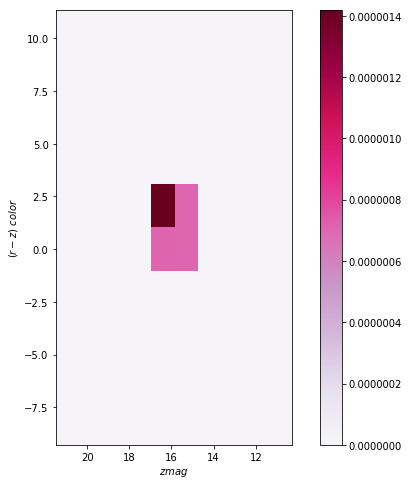

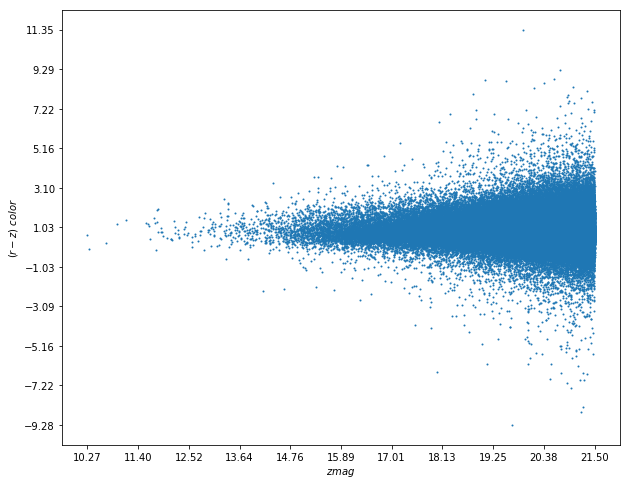

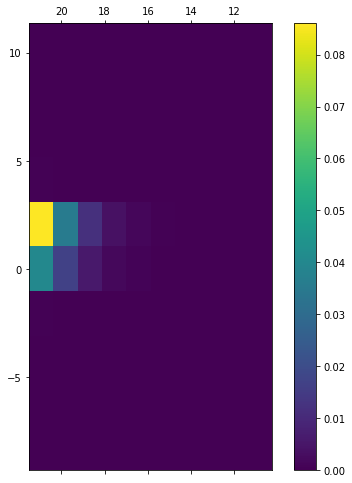

In [56]:
row = 10
column = 10
# zmag = np.concatenate([zmag_LRG, zmag_BKG])
# color = np.concatenate([color_LRG, color_BKG])
# creates histogram for survey sources; excludes LRGs
# H, xedges, yedges = np.histogram2d(rmag, grcolor, bins=5, normed=False)
# H, edges = np.histogramdd((zmag, rzcolor, grcolor), bins=(5,5,5), normed=False)
# print("xedges: ", xedges)
# print("yedges: ", yedges)

# Uses the numbers counted in the histogram to calculate a surface density: For each cell, the number of sources
# divided by the area 
# sd = H/(25.) # * (3600.**2.)) # converts square degrees to square arcseconds
# print(sd.shape)
# print(H)
# print('----')


x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

H1, edges = np.histogramdd((zmag, rzcolor, grcolor), bins=10, density=True)
# H2, edges2 = np.histogramdd((zmag, rzcolor, grcolor), bins=10, density=False)
# print(H1)
print(edges)
# H2, xedges2, yedges2 = np.histogram2d(x, y, bins=3, normed=False)
# H3, xedges3, yedges3 = np.histogram2d(x, z, bins=3, normed=False)
# H4, xedges4, yedges4 = np.histogram2d(z, y, bins=3, normed=False)

# print(H1[0])
# print(edges[0])
# print(edges[0][0])
# print(edges[1])
# print(edges[2])
# print('----')
# print(H2)
# print(H1[0])
# print('----')
# print(H3)
# print(H1[1])
# print('----')
# print(H4)
# print(H1[2])
# print('----')

# %matplotlib notebook

# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(zmag_BKG, rzcolor_BKG, grcolor_BKG, c='b', marker='o', s=1, alpha=0.1)
# # ax.scatter(zmag_LRG, rzcolor_LRG, grcolor_LRG, c='r', marker='*', s=1)

# ax.set_xlabel('zmag')
# ax.set_ylabel('(r-z)')
# ax.set_zlabel('(g-r)')

# plt.show()

# color codes bins by surface density with color bar; should make sense when compared to scatter plot
# plt.imshow(H1[0], cmap=plt.cm.PuRd)
# plt.colorbar(orientation='vertical')
# plt.gca().invert_xaxis()
# # plt.title("Surface Density Histogram")
# plt.show()

# front = H1[:,:,]
# # print(front)
# plt.imshow(front, interpolation='none') #, cmap=plt.cm.PuRd)
# plt.colorbar(orientation='vertical')
# plt.show()

# plt.imshow(H1, interpolation='none') #, cmap=plt.cm.PuRd)
# plt.colorbar(orientation='vertical')
# plt.show()

# fig, ax = plt.subplots()
# ax.set_xticks(xedges2, minor=False)
# ax.set_yticks(yedges2, minor=True)
# ax.xaxis.grid(True, which='major')
# ax.yaxis.grid(True, which='minor')

# plt.scatter(y,z)
# plt.show()

rz_vs_zmag = H1[:,:,:].sum(axis=2)
rz_vs_zmag = rz_vs_zmag.T
gr_vs_zmag = H1[:,:,:].sum(axis=0)
rz_vs_gr = H1[:,:,:].sum(axis=1)
# print(H1[0])
# print(H2[0])
# print(rz_vs_zmag)

# print(rz_vs_zmag)
# print('-----')
# print(gr_vs_zmag)
# print('-----')
# print(rz_vs_gr)

# print(rz_vs_zmag)

plt.imshow(H1[0], cmap=plt.cm.PuRd, extent=[edges[0][0], edges[0][10], edges[1][0], edges[1][10]])
plt.colorbar(orientation='vertical')
plt.gca().invert_xaxis()
# plt.title("Surface Density Histogram")
plt.xlabel(r'$zmag$')
plt.ylabel(r'$(r-z)$ $color$')
# plt.ylim(400,600)
plt.show()

# plt.imshow(H2[0], cmap=plt.cm.PuRd)
# plt.colorbar(orientation='vertical')
# plt.gca().invert_xaxis()
# # plt.title("Surface Density Histogram")
# plt.xlabel(r'$zmag$')
# plt.ylabel(r'$(r-z)$ $color$')
# # plt.ylim(400,600)
# plt.show()

fig,ax = plt.subplots()

plt.scatter(zmag, rzcolor, s=1)
plt.gca().invert_xaxis()
ax.set_xticks(edges[0], minor=False)
ax.set_yticks(edges[1], minor=False)
plt.xlabel(r'$zmag$')
plt.ylabel(r'$(r-z)$ $color$')
plt.gca().invert_xaxis()
ax.xaxis.grid(True, which='minor')
ax.yaxis.grid(True, which='minor')
plt.show()

plt.matshow(rz_vs_zmag, extent=[edges[0][0], edges[0][10], edges[1][0], edges[1][10]])
plt.gca().invert_xaxis()
plt.colorbar(orientation='vertical')
plt.show()

# plt.hist2d(zmag, rzcolor, bins=(100,100), cmap=plt.cm.PuBu)
# plt.colorbar(orientation='vertical')
# plt.xlabel(r'$zmag$')
# plt.ylabel(r'$(r-z)$ $color$')
# plt.ylim(-1.5, 3.5)
# # plt.xlim(14,21.5)
# plt.gca().invert_xaxis()
# plt.show()

# plt.hist2d(zmag, grcolor, bins=(100,100), cmap=plt.cm.Greens)
# plt.colorbar(orientation='vertical')
# plt.xlabel(r'$zmag$')
# plt.ylabel(r'$(g-r)$ $color$')
# plt.ylim(-1.5, 3.5)
# plt.xlim(14,21.5)
# plt.gca().invert_xaxis()
# plt.show()

# plt.hist2d(grcolor, rzcolor, bins=(100,100), cmap=plt.cm.Purples)
# plt.colorbar(orientation='vertical')
# plt.xlabel(r'$(g-r)$ $color$')
# plt.ylabel(r'$(r-z)$ $color$')
# # plt.ylim(-1.5, 3.5)
# # plt.xlim(14,21.5)
# # plt.gca().invert_xaxis()
# plt.show()

# import seaborn as sns; sns.set(color_codes=True)

# sns.kdeplot(zmag, rzcolor, n_levels=10, cbar=True)
# plt.show()

# plt.scatter(zmag, grcolor, s=1)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$zmag$')
# plt.ylabel(r'$(g-r)$ $color$')
# plt.show()

# plt.hist2d(zmag, grcolor, bins=(100,100)) #, cmap=plt.cm.PuRd)
# plt.colorbar(orientation='vertical')
# plt.xlabel(r'$zmag$')
# plt.ylabel(r'$(g-r)$ $color$')
# plt.ylim(0., 2.)
# plt.xlim(14,21.5)
# plt.gca().invert_xaxis()
# plt.show()

In [ ]:
plt.imshow(rz_vs_zmag, cmap=plt.cm.PuRd)
plt.colorbar(orientation='vertical')
plt.title("(r-z) vs zmag")
plt.show()

# print(rz_vs_zmag)

# plt.imshow(gr_vs_zmag, cmap=plt.cm.PuRd)
# plt.colorbar(orientation='vertical')
# plt.title("(g-r) vs zmag")
# plt.show()

# plt.imshow(rz_vs_gr, cmap=plt.cm.PuRd)
# plt.colorbar(orientation='vertical')
# plt.title("(r-z) vs (g-r)")
# plt.show()


# # color codes bins by surface density with color bar; should make sense when compared to scatter plot
# plt.imshow(H2, cmap=plt.cm.PuRd)
# plt.colorbar(orientation='vertical')
# plt.gca().invert_xaxis()
# # plt.title("Surface Density Histogram")

# plt.imshow(H3, cmap=plt.cm.PuRd)
# plt.colorbar(orientation='vertical')
# plt.gca().invert_xaxis()
# # plt.title("Surface Density Histogram")

# plt.imshow(H4, cmap=plt.cm.PuRd)
# plt.colorbar(orientation='vertical')
# plt.gca().invert_xaxis()
# # plt.title("Surface Density Histogram")

# plt.show()

In [ ]:
plt.scatter(zmag, rzcolor)
plt.show()

In [32]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hpy.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra)):
    theta.append(np.radians(90. - dec[i]))
    phi.append(np.radians(ra[i]))

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hpy.ang2pix(nside, theta, phi, nest=True)

length phi:  292428


In [33]:
distance = 0.5 # must be in Mpc

distance_kpc, near, gal_tree, dist, index, num = nearNeighbor(distance, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, zmag, rzcolor, grcolor, edges)

print('end nearNeighbor')

end nearNeighbor


In [ ]:
# print(near[0])
# print(index[0])
# print(num[0])
# print(num[1])


mean number of near neighbors is 27.83499005964215
median number of near neighbors is 23.0
standard deviation of near neighbor is 22.877485271676303
standard error is 0.5101551193762941


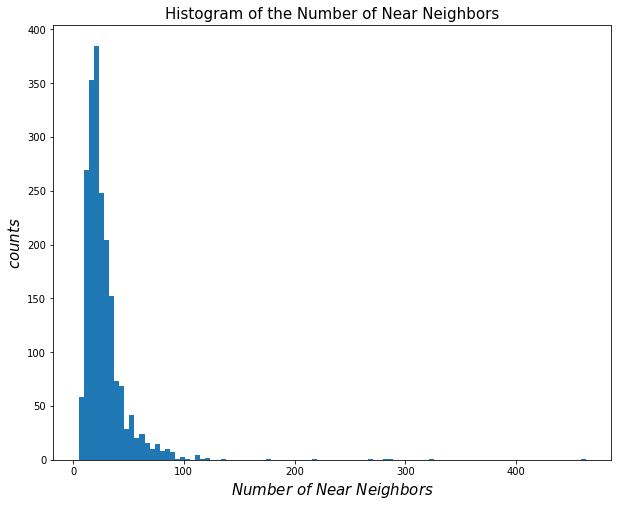

(2012, 10, 10, 10)


In [34]:
totalNear(near)

# plt.savefig('/Users/mtownsend/Desktop/Nnear.pdf')

plt.show()

print(np.array(near).shape)

In [35]:
# distance_r2 = 0.4 # in degree
# distance_r3 = 0.5 # in degree

# numbkg, med_local, sigma, omega, Nbkg = localBKG_and_interlopers(distance_kpc, distance_r2, distance_r3, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_LRG, rmag_BKG, color_LRG, color_BKG, xedges, yedges)

inner_dist = 0.4 # in deg
outer_dist = 0.5 # in deg

Nbkg, indices, omega, localBKG = localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, ra_LRG, dec_LRG, pixnums, zmag, rzcolor, grcolor, edges, distance_kpc, kpc_DA)

omega = np.array(omega)

print("end bkg")

end bkg


mean number of interlopers is 21.299372459781935
median number of interlopers is 17.657379933057555
standard deviation of interloper is 18.86233893432027
standard error is 0.4206196029188479


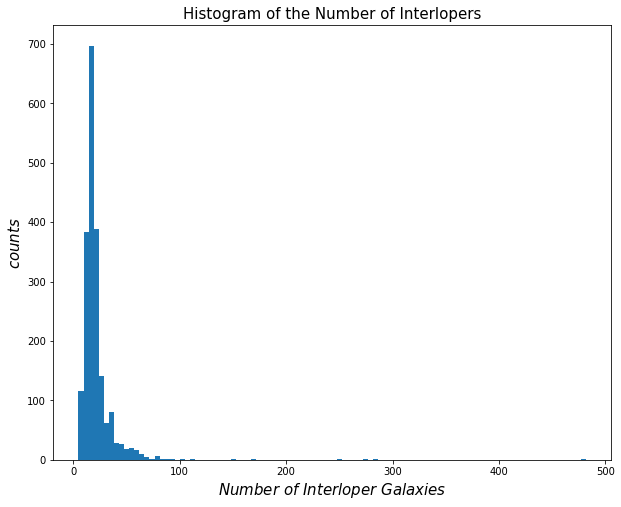

2012
(2012, 10, 10, 10)


In [36]:
totalNbkg(Nbkg)

plt.show()

Nbkg = np.array(Nbkg)

print(len(Nbkg))
print(Nbkg.shape)


In [ ]:
sumbkg = []
nbkg = []

# Sum up number of background galaxies for every LRG
for i in range(len(localBKG)):
    sumbkg.append(np.sum(localBKG[i]))
    
for i in range(len(Nbkg)):
    nbkg.append(np.sum(Nbkg[i]))
    
sumbkg = np.array(sumbkg)
nbkg = np.array(nbkg)


plt.scatter(z_LRG[np.where(z_LRG <= 0.2)], sumbkg[np.where(z_LRG <= 0.2)], s = 5, marker = '*', color='blue', label="z <= 0.2")
plt.title("Redshift vs Background Galaxies; z <= 0.2", fontsize=15)
plt.xlabel(r'$Redshift$', fontsize=15)
plt.ylabel(r'$Background$', fontsize=15)
plt.show()

meanbkg = np.mean(sumbkg)
print("mean number of interlopers is", meanbkg)

# print(ra_LRG[np.where((nbkg > 125) & (z_LRG <= 0.2))])
# print(dec_LRG[np.where((nbkg > 125) & (z_LRG <= 0.2))])


In [37]:
Nsat = np.array(near) - np.array(Nbkg)

# print(Nsat)

print("end Nsat")
print(Nsat.shape)

end Nsat
(2012, 10, 10, 10)


mean number of satellites is 6.535617599860215
median number of satellites is 4.54314638722546
standard deviation of satellites is 11.154206355004176
standard error is 0.24873255985132245


4.54314638722546

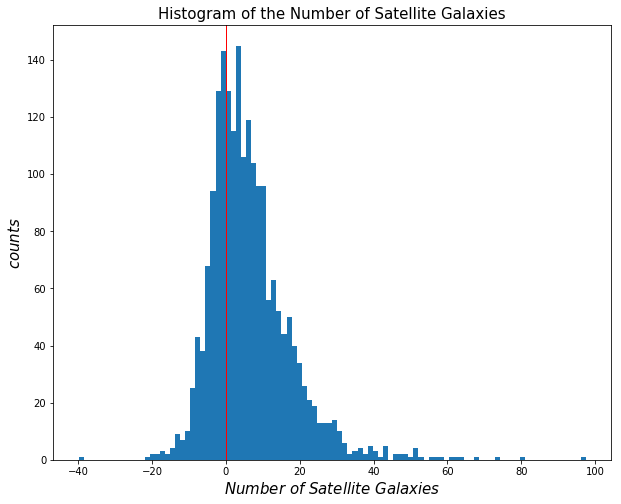

In [38]:
totalNsat(Nsat)

# plt.savefig("/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/totalNsat.pdf")
# plt.savefig("/Users/mindy/Research/Plots/LRG_Project_Plots/totalNsat.pdf")
# plt.savefig

19.122823121214065
10.459995566773227
12.531764842930812
19.122823121214065
10.459995566773227
12.531764842930812
19.12282312121406
19.12282312121406
19.122823121214065


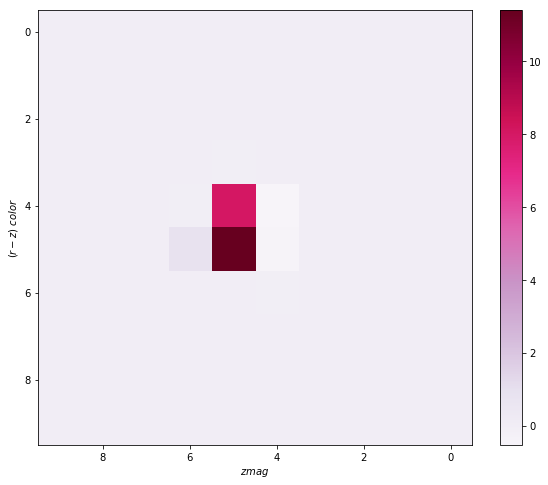

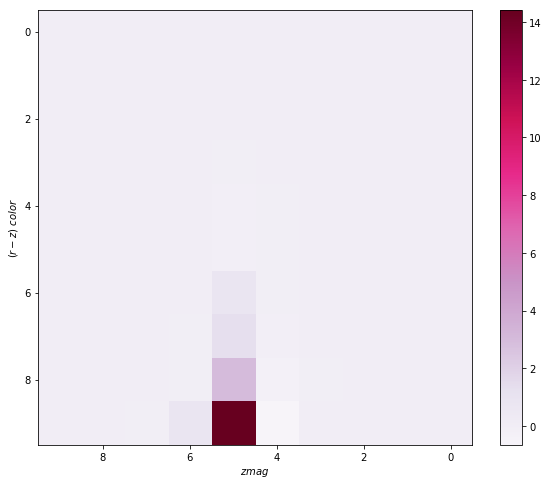

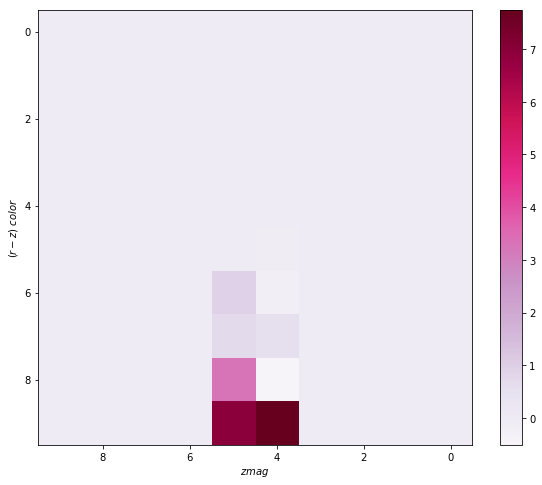

In [40]:
# plt.scatter(zmag_BKG, rzcolor_BKG, s = 1, marker = '+', color='blue', label="Background")
# plt.scatter(zmag_LRG, rzcolor_LRG, s = 1, marker = '*', color='red', label='LRGs')
# plt.gca().invert_xaxis()
# plt.title("Color-Magnitude Diagram", fontsize=15)
# plt.xlabel(r'$z-mag$')
# plt.ylabel(r'$(r-z)$ $color$')
# plt.legend(loc='upper right', prop={'size': 12})
# plt.show()

# print(Nsat[0])

sumsat = []
for i in range(len(Nsat)):
    sumsat.append(np.sum(Nsat[i]))
    
print(sumsat[0])
print(sumsat[1])
print(sumsat[2])

x = Nsat[0][:,:,:].sum(axis=0)
y = Nsat[0][:,:,:].sum(axis=1)
z = Nsat[0][:,:,:].sum(axis=2)

print(np.sum(Nsat[0]))
print(np.sum(Nsat[1]))
print(np.sum(Nsat[2]))

print(np.sum(x))
print(np.sum(y))
print(np.sum(z))
# print(Nsat[0])

plt.imshow(x, cmap=plt.cm.PuRd)
plt.colorbar(orientation='vertical')
plt.gca().invert_xaxis()
# plt.title("Surface Density Histogram")
plt.xlabel(r'$zmag$')
plt.ylabel(r'$(r-z)$ $color$')
# plt.ylim(400,600)
plt.show()

plt.imshow(y, cmap=plt.cm.PuRd)
plt.colorbar(orientation='vertical')
plt.gca().invert_xaxis()
# plt.title("Surface Density Histogram")
plt.xlabel(r'$zmag$')
plt.ylabel(r'$(r-z)$ $color$')
# plt.ylim(400,600)
plt.show()

plt.imshow(z, cmap=plt.cm.PuRd)
plt.colorbar(orientation='vertical')
plt.gca().invert_xaxis()
# plt.title("Surface Density Histogram")
plt.xlabel(r'$zmag$')
plt.ylabel(r'$(r-z)$ $color$')
# plt.ylim(400,600)
plt.show()

In [ ]:
plt.scatter(grcolor_BKG, rzcolor_BKG, s = 1, marker = '+', color='blue', label="Background")
plt.scatter(grcolor_LRG, rzcolor_LRG, s = 1, marker = '*', color='red', label='LRGs')
# plt.gca().invert_xaxis()
plt.title("Color-Color Diagram", fontsize=15)
plt.xlabel(r'$(g-r)$ $color$')
plt.ylabel(r'$(r-z)$ $color$')
plt.legend(loc='upper right', prop={'size': 12})
plt.show()

In [ ]:
# Plots of Nsat and near vs LRG redshift

sumsat, sumsat1z, sumsat2z, sumsat3z, sumsat4z, sumsat5z, sumsat6z, sumsat7z, sumsat1r, sumsat2r, sumsat3r, sumsat4r, sumsat5r, sumsat6r, sumsat7r, sumsat1g, sumsat2g, sumsat3g, sumsat4g, sumsat5g, sumsat6g, sumsat7g, sumsat8g, sumsat1_zmag, sumsat2_zmag, sumsat3_zmag, sumsat4_zmag, sumsat5_zmag, sumsat6_zmag, sumsat7_zmag = sumNsat(Nsat, z_LRG, rmag_LRG, gmag_LRG, zmag_LRG)

sumnear, sumnear1z, sumnear2z, sumnear3z, sumnear4z, sumnear5z, sumnear6z, sumnear7z, sumnear1r, sumnear2r, sumnear3r, sumnear4r, sumnear5r, sumnear6r, sumnear7r, sumnear1g, sumnear2g, sumnear3g, sumnear4g, sumnear5g, sumnear6g, sumnear7g, sumnear8g, sumnear1_zmag, sumnear2_zmag, sumnear3_zmag, sumnear4_zmag, sumnear5_zmag, sumnear6_zmag, sumnear7_zmag = sumNN(near, z_LRG, rmag_LRG, gmag_LRG, zmag_LRG)

sumsat = np.array(sumsat)
sumnear = np.array(sumnear)

plt.scatter(z_LRG, sumsat, s=1, c='purple')
# plt.scatter(z_LRG[np.where(z_LRG <= 0.2)], sumsat[np.where(z_LRG <= 0.2)], s=1, marker = '*', color='blue', label="z <= 0.2")
# plt.scatter(z_LRG[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], sumsat[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], s=1, marker = '*', color='green', label="0.2 < z <= 0.3")
# plt.scatter(z_LRG[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], sumsat[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], s=1, marker = '*', color='orange', label="0.3 < z <= 0.4")
# plt.scatter(z_LRG[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], sumsat[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], s=1, marker = '*', color='purple', label="0.4 < z <= 0.5")
# plt.scatter(z_LRG[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], sumsat[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], s=1, marker = '*', color='teal', label="0.5 < z <= 0.6")
# plt.scatter(z_LRG[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], sumsat[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], s=1, marker = '*', color='magenta', label="0.6 < z <= 0.7")
# plt.scatter(z_LRG[np.where(z_LRG > 0.7)], sumsat[np.where(z_LRG > 0.7)], s=1, marker = '*', color='brown', label="z > 0.7")
plt.title("Number of Satellites vs LRG Redshift", fontsize=15)
plt.xlabel(r'$LRG$ $Redshift$', fontsize=15)
plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)
# plt.legend(loc='upper right', prop={'size': 10}, markerscale=10)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_redshift.pdf')

plt.show()

plt.scatter(z_LRG, sumnear, s=1, c='indigo')
# plt.scatter(z_LRG[np.where(z_LRG <= 0.2)], sumnear[np.where(z_LRG <= 0.2)], s=1, marker = '*', color='blue', label="z <= 0.2")
# plt.scatter(z_LRG[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], sumnear[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], s=1, marker = '*', color='green', label="0.2 < z <= 0.3")
# plt.scatter(z_LRG[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], sumnear[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], s=1, marker = '*', color='orange', label="0.3 < z <= 0.4")
# plt.scatter(z_LRG[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], sumnear[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], s=1, marker = '*', color='purple', label="0.4 < z <= 0.5")
# plt.scatter(z_LRG[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], sumnear[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], s=1, marker = '*', color='teal', label="0.5 < z <= 0.6")
# plt.scatter(z_LRG[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], sumnear[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], s=1, marker = '*', color='magenta', label="0.6 < z <= 0.7")
# plt.scatter(z_LRG[np.where(z_LRG > 0.7)], sumnear[np.where(z_LRG > 0.7)], s=1, marker = '*', color='brown', label="z > 0.7")
plt.title("Near Neighbors vs LRG Redshift", fontsize=15)
plt.xlabel(r'$LRG$ $Redshift$', fontsize=15)
plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)
# plt.legend(loc='upper right', prop={'size': 10}, markerscale=10)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_redshift.pdf')

plt.show()


In [ ]:
# Plots of Nsat and near vs magnitude

sumsat, sumsat1z, sumsat2z, sumsat3z, sumsat4z, sumsat5z, sumsat6z, sumsat7z, sumsat1r, sumsat2r, sumsat3r, sumsat4r, sumsat5r, sumsat6r, sumsat7r, sumsat1g, sumsat2g, sumsat3g, sumsat4g, sumsat5g, sumsat6g, sumsat7g, sumsat8g, sumsat1_zmag, sumsat2_zmag, sumsat3_zmag, sumsat4_zmag, sumsat5_zmag, sumsat6_zmag, sumsat7_zmag = sumNsat(Nsat, z_LRG, rmag_LRG, gmag_LRG, zmag_LRG)

sumnear, sumnear1z, sumnear2z, sumnear3z, sumnear4z, sumnear5z, sumnear6z, sumnear7z, sumnear1r, sumnear2r, sumnear3r, sumnear4r, sumnear5r, sumnear6r, sumnear7r, sumnear1g, sumnear2g, sumnear3g, sumnear4g, sumnear5g, sumnear6g, sumnear7g, sumnear8g, sumnear1_zmag, sumnear2_zmag, sumnear3_zmag, sumnear4_zmag, sumnear5_zmag, sumnear6_zmag, sumnear7_zmag = sumNN(near, z_LRG, rmag_LRG, gmag_LRG, zmag_LRG)

sumsat = np.array(sumsat)
sumnear = np.array(sumnear)

# Plots of Nsat and near vs rmag

# plt.scatter(rmag_LRG, sumsat, s=1, c='purple')
# plt.title("Number of Satellites vs r-magnitude", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)
# plt.legend(loc='upper left', prop={'size': 10}, markerscale=10)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_rmag-colorcoded.pdf')

# plt.show()

# plt.scatter(rmag_LRG[np.where(z_LRG <= 0.2)], sumsat[np.where(z_LRG <= 0.2)], s=2, marker = '*', color='blue', label="z <= 0.2")
# plt.title("Number of Satellites vs r-magnitude (z <= 0.2)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_rmag-z02.pdf')

# plt.show()

# plt.scatter(rmag_LRG[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], sumsat[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], s=2, marker = '*', color='green', label="0.2 < z <= 0.3")
# plt.title("Number of Satellites vs r-magnitude (0.2 < z <= 0.3)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_rmag-z0203.pdf')

# plt.show()

# plt.scatter(rmag_LRG[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], sumsat[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], s=2, marker = '*', color='orange', label="0.3 < z <= 0.4")
# plt.title("Number of Satellites vs r-magnitude (0.3 < z <= 0.4)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_rmag-z0304.pdf')

# plt.show()

# plt.scatter(rmag_LRG[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], sumsat[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], s=2, marker = '*', color='purple', label="0.4 < z <= 0.5")
# plt.title("Number of Satellites vs r-magnitude (0.4 < z <= 0.5)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_rmag-z0405.pdf')

# plt.show()

# plt.scatter(rmag_LRG[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], sumsat[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], s=2, marker = '*', color='teal', label="0.5 < z <= 0.6")
# plt.title("Number of Satellites vs r-magnitude (0.5 < z <= 0.6)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_rmag-z0506.pdf')

# plt.show()

# plt.scatter(rmag_LRG[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], sumsat[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], s=2, marker = '*', color='magenta', label="0.6 < z <= 0.7")
# plt.title("Number of Satellites vs r-magnitude (0.6 < z <= 0.7)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_rmag-z0607.pdf')

# plt.show()

# plt.scatter(rmag_LRG[np.where(z_LRG > 0.7)], sumsat[np.where(z_LRG > 0.7)], s=2, marker = '*', color='brown', label="z > 0.7")
# plt.title("Number of Satellites vs r-magnitude (z > 0.7)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_rmag-z07.pdf')

# plt.show()

# plt.title("Number of Satellites vs r-magnitude", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)
# plt.legend(loc='upper left', prop={'size': 10}, markerscale=10)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_rmag-colorcoded.pdf')

# plt.show()

# # plt.scatter(rmag_LRG, sumnear, s=1, c='purple')
# plt.title("Number of Near Neighbors vs r-magnitude", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)
# plt.legend(loc='upper left', prop={'size': 10}, markerscale=10)

# # plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_rmag-colorcoded.pdf')

# # plt.show()

# plt.scatter(rmag_LRG[np.where(z_LRG <= 0.2)], sumnear[np.where(z_LRG <= 0.2)], s=2, marker = '*', color='blue', label="z <= 0.2")
# plt.title("Number of Near Neighbors vs r-magnitude (z <= 0.2)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_rmag-z02.pdf')

# plt.show() 

# plt.scatter(rmag_LRG[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], sumnear[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], s=2, marker = '*', color='green', label="0.2 < z <= 0.3")
# plt.title("Number of Near Neighbors vs r-magnitude (0.2 < z <= 0.3)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_rmag-z0203.pdf')

# plt.show()

# plt.scatter(rmag_LRG[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], sumnear[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], s=2, marker = '*', color='orange', label="0.3 < z <= 0.4")
# plt.title("Number of Near Neighbors vs r-magnitude (0.3 < z <= 0.4)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_rmag-z0304.pdf')

# plt.show()

# plt.scatter(rmag_LRG[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], sumnear[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], s=2, marker = '*', color='purple', label="0.4 < z <= 0.5")
# plt.title("Number of Near Neighbors vs r-magnitude (0.4 < z <= 0.5)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_rmag-z0405.pdf')

# plt.show()

# plt.scatter(rmag_LRG[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], sumnear[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], s=2, marker = '*', color='teal', label="0.5 < z <= 0.6")
# plt.title("Number of Near Neighbors vs r-magnitude (0.5 < z <= 0.6)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_rmag-z0506.pdf')

# plt.show()

# plt.scatter(rmag_LRG[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], sumnear[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], s=2, marker = '*', color='magenta', label="0.6 < z <= 0.7")
# plt.title("Number of Near Neighbors vs r-magnitude (0.6 < z <= 0.7)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_rmag-z0607.pdf')

# plt.show()

# plt.scatter(rmag_LRG[np.where(z_LRG > 0.7)], sumnear[np.where(z_LRG > 0.7)], s=2, marker = '*', color='brown', label="z > 0.7")
# plt.title("Number of Near Neighbors vs r-magnitude (z > 0.7)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$r-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_rmag-z07.pdf')

# plt.show()


# # Plots of Nsat and near vs gmag

# # plt.scatter(gmag_LRG, sumsat, s=1, c='purple')
# plt.title("Number of Satellites vs g-magnitude", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$g-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)
# plt.legend(loc='upper left', prop={'size': 10}, markerscale=10)

# # plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_gmag-colorcoded.pdf')

# # plt.show()

# plt.scatter(gmag_LRG[np.where(z_LRG <= 0.2)], sumsat[np.where(z_LRG <= 0.2)], s=2, marker = '*', color='blue', label="z <= 0.2")
# plt.title("Number of Satellites vs g-magnitude (z <= 0.2)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$g-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_gmag-z02.pdf')

# plt.show()

# plt.scatter(gmag_LRG[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], sumsat[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], s=2, marker = '*', color='green', label="0.2 < z <= 0.3")
# plt.title("Number of Satellites vs g-magnitude (0.2 < z <= 0.3)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$g-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_gmag-z0203.pdf')

# plt.show()

# plt.scatter(gmag_LRG[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], sumsat[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], s=2, marker = '*', color='orange', label="0.3 < z <= 0.4")
# plt.title("Number of Satellites vs g-magnitude (0.3 < z <= 0.4)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$g-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_gmag-z0304.pdf')

# plt.show()

# plt.scatter(gmag_LRG[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], sumsat[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], s=2, marker = '*', color='purple', label="0.4 < z <= 0.5")
# plt.title("Number of Satellites vs g-magnitude (0.4 < z <= 0.5)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$g-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_gmag-z0405.pdf')

# plt.show()

# plt.scatter(gmag_LRG[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], sumsat[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], s=2, marker = '*', color='teal', label="0.5 < z <= 0.6")
# plt.title("Number of Satellites vs g-magnitude (0.5 < z <= 0.6)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$g-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_gmag-z0506.pdf')

# plt.show()

# plt.scatter(gmag_LRG[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], sumsat[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], s=2, marker = '*', color='magenta', label="0.6 < z <= 0.7")
# plt.title("Number of Satellites vs g-magnitude (0.6 < z <= 0.7)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$g-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_gmag-z0607.pdf')

# plt.show()

# plt.scatter(gmag_LRG[np.where(z_LRG > 0.7)], sumsat[np.where(z_LRG > 0.7)], s=2, marker = '*', color='brown', label="z > 0.7")
# plt.title("Number of Satellites vs g-magnitude (z > 0.7)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$g-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_gmag-z07.pdf')

# plt.show()

# # plt.scatter(gmag_LRG, sumnear, s=1, c='purple')
# plt.title("Number of Near Neighbors vs g-magnitude", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$g-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)
# plt.legend(loc='upper left', prop={'size': 10}, markerscale=10)

# # plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_gmag-colorcoded.pdf')

# # plt.show()

# plt.scatter(gmag_LRG[np.where(z_LRG <= 0.2)], sumnear[np.where(z_LRG <= 0.2)], s=2, marker = '*', color='blue', label="z <= 0.2")
# plt.title("Number of Near Neighbors vs g-magnitude (z <= 0.2)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$g-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_gmag-z02.pdf')

# plt.show()

# plt.scatter(gmag_LRG[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], sumnear[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], s=2, marker = '*', color='green', label="0.2 < z <= 0.3")
# plt.title("Number of Near Neighbors vs g-magnitude (0.2 < z <= 0.3)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$g-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_gmag-z0203.pdf')

# plt.show()

# plt.scatter(gmag_LRG[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], sumnear[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], s=2, marker = '*', color='orange', label="0.3 < z <= 0.4")
# plt.title("Number of Near Neighbors vs g-magnitude (0.3 < z <= 0.4)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$g-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_gmag-z0304.pdf')

# plt.show()

# plt.scatter(gmag_LRG[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], sumnear[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], s=2, marker = '*', color='purple', label="0.4 < z <= 0.5")
# plt.title("Number of Near Neighbors vs g-magnitude (0.4 < z <= 0.5)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$g-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_gmag-z0405.pdf')

# plt.show()

# plt.scatter(gmag_LRG[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], sumnear[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], s=2, marker = '*', color='teal', label="0.5 < z <= 0.6")

# plt.title("Number of Near Neighbors vs g-magnitude (0.5 < z <= 0.6)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$g-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_gmag-z0506.pdf')

# plt.show()

# plt.scatter(gmag_LRG[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], sumnear[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], s=2, marker = '*', color='magenta', label="0.6 < z <= 0.7")
# plt.title("Number of Near Neighbors vs g-magnitude (0.6 < z <= 0.7)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$g-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_gmag-z0607.pdf')

# plt.show()

# plt.scatter(gmag_LRG[np.where(z_LRG > 0.7)], sumnear[np.where(z_LRG > 0.7)], s=2, marker = '*', color='brown', label="z > 0.7")
# plt.title("Number of Near Neighbors vs g-magnitude (z > 0.7)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$g-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_gmag-z07.pdf')

# plt.show()


# # Plots of Nsat and near vs zmag

# # plt.scatter(zmag_LRG, sumsat, s=1, c='purple')
# plt.title("Number of Satellites vs z-magnitude", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$z-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)
# plt.legend(loc='upper left', prop={'size': 10}, markerscale=10)

# # plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_zmag-colorcoded.pdf')

# # plt.show()

# plt.scatter(zmag_LRG[np.where(z_LRG <= 0.2)], sumsat[np.where(z_LRG <= 0.2)], s=2, marker = '*', color='blue', label="z <= 0.2")
# plt.title("Number of Satellites vs z-magnitude (z <= 0.2)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$z-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_zmag-z02.pdf')

# plt.show()

# plt.scatter(zmag_LRG[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], sumsat[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], s=2, marker = '*', color='green', label="0.2 < z <= 0.3")
# plt.title("Number of Satellites vs z-magnitude (0.2 < z <= 0.3)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$z-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_zmag-z0203.pdf')

# plt.show()

# plt.scatter(zmag_LRG[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], sumsat[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], s=2, marker = '*', color='orange', label="0.3 < z <= 0.4")
# plt.title("Number of Satellites vs z-magnitude (0.3 < z <= 0.4)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$z-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_zmag-z0304.pdf')

# plt.show()

# plt.scatter(zmag_LRG[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], sumsat[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], s=2, marker = '*', color='purple', label="0.4 < z <= 0.5")
# plt.title("Number of Satellites vs z-magnitude (0.4 < z <= 0.5)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$z-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_zmag-z0405.pdf')

# plt.show()

# plt.scatter(zmag_LRG[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], sumsat[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], s=2, marker = '*', color='teal', label="0.5 < z <= 0.6")
# plt.title("Number of Satellites vs z-magnitude (0.5 < z <= 0.6)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$z-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_zmag-z0506.pdf')

# plt.show()

# plt.scatter(zmag_LRG[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], sumsat[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], s=2, marker = '*', color='magenta', label="0.6 < z <= 0.7")
# plt.title("Number of Satellites vs z-magnitude (0.6 < z <= 0.7)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$z-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_zmag-z0607.pdf')

# plt.show()

# plt.scatter(zmag_LRG[np.where(z_LRG > 0.7)], sumsat[np.where(z_LRG > 0.7)], s=2, marker = '*', color='brown', label="z > 0.7")
# plt.title("Number of Satellites vs z-magnitude (z > 0.7)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$z-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_zmag-z07.pdf')

# plt.show()


# # plt.scatter(zmag_LRG, sumnear, s=1, c='purple')
# plt.title("Number of Near Neighbors vs z-magnitude", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$z-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)
# plt.legend(loc='upper left', prop={'size': 10}, markerscale=10)

# # plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_zmag-colorcoded.pdf')

# # plt.show()

# plt.scatter(zmag_LRG[np.where(z_LRG <= 0.2)], sumnear[np.where(z_LRG <= 0.2)], s=2, marker = '*', color='blue', label="z <= 0.2")
# plt.title("Number of Near Neighbors vs z-magnitude (z <= 0.2)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$z-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_zmag-z02.pdf')

# plt.show()

# plt.scatter(zmag_LRG[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], sumnear[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], s=2, marker = '*', color='green', label="0.2 < z <= 0.3")
# plt.title("Number of Near Neighbors vs z-magnitude (0.2 < z <= 0.3)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$z-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_zmag-z0203.pdf')

# plt.show()

# plt.scatter(zmag_LRG[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], sumnear[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], s=2, marker = '*', color='orange', label="0.3 < z <= 0.4")
# plt.title("Number of Near Neighbors vs z-magnitude (0.3 < z <= 0.4)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$z-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_zmag-z0304.pdf')

# plt.show()

# plt.scatter(zmag_LRG[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], sumnear[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], s=2, marker = '*', color='purple', label="0.4 < z <= 0.5")
# plt.title("Number of Near Neighbors vs z-magnitude (0.4 < z <= 0.5)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$z-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_zmag-z0405.pdf')

# plt.show()

# plt.scatter(zmag_LRG[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], sumnear[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], s=2, marker = '*', color='teal', label="0.5 < z <= 0.6")
# plt.title("Number of Near Neighbors vs z-magnitude (0.5 < z <= 0.6)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$z-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_zmag-z0506.pdf')

# plt.show()

# plt.scatter(zmag_LRG[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], sumnear[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], s=2, marker = '*', color='magenta', label="0.6 < z <= 0.7")
# plt.title("Number of Near Neighbors vs z-magnitude (0.6 < z <= 0.7)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$z-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_zmag-z0607.pdf')

# plt.show()

# plt.scatter(zmag_LRG[np.where(z_LRG > 0.7)], sumnear[np.where(z_LRG > 0.7)], s=2, marker = '*', color='brown', label="z > 0.7")
# plt.title("Number of Near Neighbors vs z-magnitude (z > 0.7)", fontsize=15)
# plt.gca().invert_xaxis()
# plt.xlabel(r'$z-mag$', fontsize=15)
# plt.ylabel(r'$Number$ $of$ $Neighbors$', fontsize=15)

# plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nnear_v_zmag-z07.pdf')

# plt.show()


In [ ]:
sumsat = []

# Sum up number of background galaxies for every LRG
for i in range(len(Nsat)):
    sumsat.append(np.sum(Nsat[i]))
    
sumsat = np.array(sumsat)

sumnear = []

# Sum up number of background galaxies for every LRG
for i in range(len(near)):
    sumnear.append(np.sum(near[i]))

sumnear = np.array(sumnear)
    
plot = fig, ax = plt.subplots(figsize=(8, 8))
# ax.set_xticks(xedges, minor=False)
# ax.set_yticks(yedges, minor=True)
# ax.xaxis.grid(True, which='major')
# ax.yaxis.grid(True, which='minor')

# plt.scatter(sumsat, sumnear, s = 5, marker = '+', color='blue')
plt.scatter(sumsat[np.where(z_LRG <= 0.2)], sumnear[np.where(z_LRG <= 0.2)], s = 3, marker = '*', color='blue', label="z <= 0.2")
# plt.title("Nsat vs Nnear; z <= 0.2", fontsize=15)
# plt.xlabel(r'$Nsat$', fontsize=15)
# plt.ylabel(r'$Nnear$', fontsize=15)
# plt.show()

plt.scatter(sumsat[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], sumnear[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], s = 3, marker = '*', color='green', label="0.2 < z <= 0.3")
# plt.title("Nsat vs Nnear; 0.2 < z <= 0.3", fontsize=15)
# plt.xlabel(r'$Nsat$', fontsize=15)
# plt.ylabel(r'$Nnear$', fontsize=15)
# plt.show()

plt.scatter(sumsat[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], sumnear[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], s = 3, marker = '*', color='orange', label="0.3 < z <= 0.4")
# plt.title("Nsat vs Nnear; 0.3 < z <= 0.4", fontsize=15)
# plt.xlabel(r'$Nsat$', fontsize=15)
# plt.ylabel(r'$Nnear$', fontsize=15)
# plt.show()

plt.scatter(sumsat[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], sumnear[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], s = 3, marker = '*', color='purple', label="0.4 < z <= 0.5")
# plt.title("Nsat vs Nnear; 0.4 < z <= 0.5", fontsize=15)
# plt.xlabel(r'$Nsat$', fontsize=15)
# plt.ylabel(r'$Nnear$', fontsize=15)
# plt.show()

plt.scatter(sumsat[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], sumnear[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], s = 3, marker = '*', color='teal', label="0.5 < z <= 0.6")
# plt.title("Nsat vs Nnear; 0.5 < z <= 0.6", fontsize=15)
# plt.xlabel(r'$Nsat$', fontsize=15)
# plt.ylabel(r'$Nnear$', fontsize=15)
# plt.show()

plt.scatter(sumsat[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], sumnear[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], s = 3, marker = '*', color='magenta', label="0.6 < z <= 0.7")
# plt.title("Nsat vs Nnear; 0.6 < z <= 0.7", fontsize=15)
# plt.xlabel(r'$Nsat$', fontsize=15)
# plt.ylabel(r'$Nnear$', fontsize=15)
# plt.show()

plt.scatter(sumsat[np.where(z_LRG > 0.7)], sumnear[np.where(z_LRG > 0.7)], s = 3, marker = '*', color='brown', label="z > 0.7")
# plt.title("Nsat vs Nnear; z > 0.7", fontsize=15)
# plt.xlabel(r'$Nsat$', fontsize=15)
# plt.ylabel(r'$Nnear$', fontsize=15)
# plt.show()

# plt.gca().invert_xaxis()
# plt.xlim(-20, 80)
# plt.ylim(0, 120)
plt.title("Nsat vs Nnear", fontsize=15)
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$Nnear$', fontsize=15)
ax.tick_params(labelsize=12)
plt.legend(loc='upper right', prop={'size': 10}, markerscale=10)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_Nnear-colorcoded.pdf')

plt.show()

# plt.scatter(sumsat[np.where(z_LRG <= 0.2)], sumnear[np.where(z_LRG <= 0.2)], s = 3, marker = '*', color='blue', label="z <= 0.2")
# plt.title("Nsat vs Nnear; z <= 0.2", fontsize=15)
# plt.xlabel(r'$Nsat$', fontsize=15)
# plt.ylabel(r'$Nnear$', fontsize=15)
# plt.show()


In [ ]:
from scipy.optimize import curve_fit

def line(x,a,b):
    return a*x + b

# popt, pcov = curve_fit(line, sumsat[np.where(z_LRG <= 0.2)], sumnear[np.where(z_LRG <= 0.2)])
popt, pcov = curve_fit(line, sumsat[np.where(z_LRG <= 0.2)], sumnear[np.where(z_LRG <= 0.2)])
print("mean background: ", popt[1])

omega1 = np.mean(omega[np.where(z_LRG <= 0.2)])

print(popt[1] / omega1)

# plt.plot(sumsat[np.where((z_LRG > 0.14) & (z_LRG <= 0.2))], sumnear[np.where((z_LRG > 0.14) & (z_LRG <= 0.2))], '*')
# plt.plot(sumsat[np.where((z_LRG > 0.14) & (z_LRG <= 0.2))], line(sumsat[np.where((z_LRG > 0.14) & (z_LRG <= 0.2))], popt[0], popt[1]), '-r')
plt.plot(sumsat[np.where(z_LRG <= 0.2)], sumnear[np.where(z_LRG <= 0.2)], '*', color='blue')
plt.plot(sumsat[np.where(z_LRG <= 0.2)], line(sumsat[np.where(z_LRG <= 0.2)], popt[0], popt[1]), '-r')
plt.text(-30, 225, 'Nbkg density: ', fontsize=12)
plt.text(-30, 213, popt[1]/omega1, fontsize=12)
plt.title("Nsat vs Nnear; z <= 0.2", fontsize=15)
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$Nnear$', fontsize=15)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_Nnear-z02.pdf')

plt.show()


In [ ]:
from scipy.optimize import curve_fit

def line(x,a,b):
    return a*x + b

popt, pcov = curve_fit(line, sumsat[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], sumnear[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))])
print("mean background: ", popt[1])

omega2 = np.mean(omega[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))])

print(popt[1] / omega2)

plt.plot(sumsat[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], sumnear[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], '*', color='green')
plt.plot(sumsat[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], line(sumsat[np.where((z_LRG > 0.2) & (z_LRG <= 0.3))], popt[0], popt[1]), '-r')
plt.text(-10, 90, 'Nbkg density: ', fontsize=12)
plt.text(-10, 86.5, popt[1]/omega2, fontsize=12)
plt.title("Nsat vs Nnear; 0.2 < z <= 0.3", fontsize=15)
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$Nnear$', fontsize=15)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_Nnear-z0203.pdf')

plt.show()


In [ ]:
from scipy.optimize import curve_fit

def line(x,a,b):
    return a*x + b

popt, pcov = curve_fit(line, sumsat[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], sumnear[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))])
print("mean background: ", popt[1])

omega3 = np.mean(omega[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))])

print(popt[1] / omega3)

plt.plot(sumsat[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], sumnear[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], '*', color='orange')
plt.plot(sumsat[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], line(sumsat[np.where((z_LRG > 0.3) & (z_LRG <= 0.4))], popt[0], popt[1]), '-r')
plt.text(-5, 80, 'Nbkg density: ', fontsize=12)
plt.text(-5, 76.5, popt[1]/omega3, fontsize=12)
plt.title("Nsat vs Nnear; 0.3 < z <= 0.4", fontsize=15)
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$Nnear$', fontsize=15)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_Nnear-z0304.pdf')

plt.show()


In [ ]:
from scipy.optimize import curve_fit

def line(x,a,b):
    return a*x + b

popt, pcov = curve_fit(line, sumsat[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], sumnear[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))])
print("mean background: ", popt[1])

omega4 = np.mean(omega[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))])

print(popt[1] / omega4)

plt.plot(sumsat[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], sumnear[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], '*', color='purple')
plt.plot(sumsat[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], line(sumsat[np.where((z_LRG > 0.4) & (z_LRG <= 0.5))], popt[0], popt[1]), '-r')
plt.text(-10, 60, 'Nbkg density: ', fontsize=12)
plt.text(-10, 57, popt[1]/omega4, fontsize=12)
plt.title("Nsat vs Nnear; 0.4 < z <= 0.5", fontsize=15)
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$Nnear$', fontsize=15)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_Nnear-z0405.pdf')

plt.show()


In [ ]:
from scipy.optimize import curve_fit

def line(x,a,b):
    return a*x + b

popt, pcov = curve_fit(line, sumsat[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], sumnear[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))])
print("mean background: ", popt[1])

omega5 = np.mean(omega[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))])

print(popt[1] / omega5)

plt.plot(sumsat[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], sumnear[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], '*', color='teal')
plt.plot(sumsat[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], line(sumsat[np.where((z_LRG > 0.5) & (z_LRG <= 0.6))], popt[0], popt[1]), '-r')
plt.text(-10, 40, 'Nbkg density: ', fontsize=12)
plt.text(-10, 38, popt[1]/omega5, fontsize=12)
plt.title("Nsat vs Nnear; 0.5 < z <= 0.6", fontsize=15)
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$Nnear$', fontsize=15)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_Nnear-z0506.pdf')

plt.show()



In [ ]:
from scipy.optimize import curve_fit

def line(x,a,b):
    return a*x + b

popt, pcov = curve_fit(line, sumsat[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], sumnear[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))])
print("mean background: ", popt[1])

omega6 = np.mean(omega[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))])

print(popt[1] / omega6)

plt.plot(sumsat[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], sumnear[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], '*', color='magenta')
plt.plot(sumsat[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], line(sumsat[np.where((z_LRG > 0.6) & (z_LRG <= 0.7))], popt[0], popt[1]), '-r')
plt.text(-5, 30, 'Nbkg density: ', fontsize=12)
plt.text(-5, 28.5, popt[1]/omega6, fontsize=12)
plt.title("Nsat vs Nnear; 0.6 < z <= 0.7", fontsize=15)
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$Nnear$', fontsize=15)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_Nnear-z0607.pdf')

plt.show()


In [ ]:
from scipy.optimize import curve_fit

def line(x,a,b):
    return a*x + b

popt, pcov = curve_fit(line, sumsat[np.where(z_LRG > 0.7)], sumnear[np.where(z_LRG > 0.7)])
print("mean background: ", popt[1])

omega7 = np.mean(omega[np.where(z_LRG > 0.7)])

print(popt[1] / omega7)

plt.plot(sumsat[np.where(z_LRG > 0.7)], sumnear[np.where(z_LRG > 0.7)], '*', color='brown')
plt.plot(sumsat[np.where(z_LRG > 0.7)], line(sumsat[np.where(z_LRG > 0.7)], popt[0], popt[1]), '-r')
plt.text(-5, 25, 'Nbkg density: ', fontsize=12)
plt.text(-5, 24, popt[1]/omega7, fontsize=12)
plt.title("Nsat vs Nnear; z > 0.7", fontsize=15)
plt.xlabel(r'$Nsat$', fontsize=15)
plt.ylabel(r'$Nnear$', fontsize=15)

plt.savefig('/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/MtgPlots/Nsat_v_Nnear-z07.pdf')

plt.show()


In [ ]:
print(ra_LRG[np.where((sumnear > 250) & (z_LRG <= 0.2))])
print(dec_LRG[np.where((sumnear > 250) & (z_LRG <= 0.2))])
print('----')
print(z_LRG[np.where((sumnear > 250) & (z_LRG <= 0.2))])
print('----')
# print(z_LRG[np.where((sumnear <= 250) & (z_LRG <= 0.2))])
print(np.where((sumnear > 250) & (z_LRG <= 0.2)))
print('----')
print(brickid_LRG[np.where((sumnear > 250) & (z_LRG <= 0.2))])
print(objid_LRG[np.where((sumnear > 250) & (z_LRG <= 0.2))])
print('----')
print(specobjid[np.where((sumnear > 250) & (z_LRG <= 0.2))])

# print(rmag_LRG[np.where(sumnear > 400)])
# print(gmag_LRG[np.where(sumnear > 400)])
# print(zmag_LRG[np.where(sumnear > 400)])

# print(ra_LRG[np.where(z_LRG <= 0.2)])
# print(dec_LRG[np.where(z_LRG <= 0.2)])



In [ ]:
zHist(z_LRG)

plt.show()

In [ ]:
# cmd(zmag_BKG, rzcolor_BKG, zmag_LRG, rzcolor_LRG, xedges, yedges)

# import seaborn as sns
# import pandas as pd
from matplotlib.pyplot import *

# row = 10
# column = 10
# nx , ny = np.meshgrid(zmag_BKG, rzcolor_BKG)
# # creates histogram for survey sources; excludes LRGs
# H, xnouse, ynouse, image = hist2d(zmag_BKG, rzcolor_BKG, bins=500)
# plt.contour(H.transpose(), extent=[xedges.min(),xedges.max(),yedges.min(), yedges.max()], linewidths=3)
# plt.contour([nx,ny],H.transpose())
# plt.gca().invert_xaxis()
# plt.ylim([5.5,-5.5])
# # plt.colorbar(image)
# plt.imshow(im, cmap='gray')
# plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='scatter_density')
# density = ax.scatter_density(zmag_BKG, rzcolor_BKG, vmin=0, vmax=50, cmap=plt.cm.Purples)
# plt.show()

# plt.rcParams['axes.facecolor'] = '0'
# H, xnouse, ynouse, image = hist2d(zmag_BKG, rzcolor_BKG, bins=500)
# plt.contour(H.transpose(), extent=[xedges.min(),xedges.max(),yedges.min(), yedges.max()], linewidths=1, cmap='cool')
# plt.show()

density = ax.scatter_density(zmag_BKG, rzcolor_BKG, vmin=0, vmax=20, cmap=plt.cm.Blues)
# # plt.scatter(zmag_BKG, gzcolor_BKG, s=1, marker = '*', color='red')
plt.scatter(zmag_LRG, gzcolor_LRG, s=1, marker = '*', color='red')
plt.gca().invert_xaxis()
plt.xlim(21.5, 15)
plt.ylim([-5,7.5])
plt.xlabel(r'$z-mag$',fontsize=15)
plt.ylabel(r'$(r-z)$ $color$', fontsize=15)
# plt.legend(loc='upper right', prop={'size': 13}, markerscale=13)
fig.colorbar(density, label='Number Density') #, extend='max')
ax.tick_params(labelsize=12)
plt.savefig('/Users/mtownsend/Desktop/CMD-density.png')
plt.show()


# N = 10000000
# x = np.random.normal(4,2,N)
# y = np.random.normal(3,1,N)

# fig = plt.figure()
# ax = fig.add_subplot(1,1,1,projection='scatter_density')
# ax.scatter_density(x,y)
# ax.set_xlim(-5,10)
# ax.set_ylim(-5,10)
# plt.show()


# plt.hexbin(zmag_BKG, rzcolor_BKG, gridsize=100, cmap=plt.cm.Purples)
# plt.scatter(zmag_LRG, gzcolor_LRG, s=1, marker = '*', color='red')
# plt.gca().invert_xaxis()
# plt.colorbar()
# plt.show()



In [ ]:
# cmd(zmag_BKG, gzcolor_BKG, zmag_LRG, gzcolor_LRG, xedges, yedges)

plot = fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticks(xedges, minor=False)
ax.set_yticks(yedges, minor=True)
# ax.xaxis.grid(True, which='major')
# ax.yaxis.grid(True, which='minor')

plt.scatter(zmag_BKG, rzcolor_BKG, s = 1, marker = '+', color='blue', label="Background")
plt.scatter(zmag_LRG, rzcolor_LRG, s = 1, marker = '*', color='red', label='LRGs')
plt.gca().invert_xaxis()
plt.title("Color-Magnitude Diagram", fontsize=15)
plt.xlabel(r'$z-mag$', fontsize=15)
plt.ylabel(r'$(r-z)$ $color$', fontsize=15)
ax.tick_params(labelsize=12)
plt.legend(loc='upper right', prop={'size': 15}, markerscale=15)

plt.savefig('/Users/mtownsend/Desktop/rz_CMD.png')

plt.show()

In [ ]:
distance_r2 = 0.4
distance_r3 = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]

sum_sat = []
median_sat = []
Nsat = []
for i in range(len(distance_r3)):
    numbkg, med_local, sigma, omega, Nbkg, r2, dist_r2, r3, dist_r3 = localBKG_and_interlopers(distance_kpc, distance_r2, distance_r3[i], kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_LRG, rmag_BKG, color_LRG, color_BKG, xedges, yedges)
    Nsat = np.array(near) - np.array(Nbkg)
    mediansat = totalNsat(Nsat)
#     sum_sat.append(np.sum(N_sat))
    median_sat.append(mediansat)


In [ ]:
print(median_sat)

plt.plot(distance_r3, median_sat)
plt.show()

In [ ]:
# z < 0.2
Nsat1z = Nsat[np.where((z_LRG < 0.2) & (0.4 > z_LRG))]
# print(len(Nsat1z))

sumsat1z = []
for i in range(len(Nsat1z)):
    sumsat1z.append(np.sum(Nsat1z[i]))
    
# 0.2 <= z < 0.3
Nsat2z = Nsat[np.where((z_LRG >= 0.4) & (0.6 > z_LRG))]
# print(len(Nsat2z))

sumsat2z = []
for i in range(len(Nsat2z)):
    sumsat2z.append(np.sum(Nsat2z[i]))

# 0.3 <= z < 0.4
Nsat3z = Nsat[np.where(z_LRG >= 0.6)]
# print(len(Nsat3z))

sumsat3z = []
for i in range(len(Nsat3z)):
    sumsat3z.append(np.sum(Nsat3z[i]))
    

    
# Calculate mean for every redshift slice
mean_sumsat1z = np.median(sumsat1z)
print("mean number of satellites at 0.2 <= z < 0.4:", mean_sumsat1z)
mean_sumsat2z = np.median(sumsat2z)
print("mean number of satellites at 0.4 <= z < 0.6:", mean_sumsat2z)
mean_sumsat3z = np.median(sumsat3z)
print("mean number of satellites at 0.6 >= z :", mean_sumsat3z)

# plt.title("Histogram of the Number of Satellite Galaxies at Different LRG Redshift Slices")
plt.hist(sumsat1z, bins=25, alpha=0.5, label='0.2 <= z < 0.4')
plt.xlabel(r'$satellites$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.legend(loc='upper right', prop={'size': 15}, markerscale=15)
ax.tick_params(labelsize=14)
plt.savefig('/Users/mtownsend/Desktop/z1hist.png')
plt.show()
plt.hist(sumsat2z, bins=25, alpha=0.5, label='0.4 <= z < 0.6')
plt.xlabel(r'$satellites$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.legend(loc='upper right', prop={'size': 15}, markerscale=15)
ax.tick_params(labelsize=14)
plt.savefig('/Users/mtownsend/Desktop/z2hist.png')
plt.show()
plt.hist(sumsat3z, bins=25, alpha=0.5, label='0.6 >= z')
plt.xlabel(r'$satellites$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.legend(loc='upper right', prop={'size': 15}, markerscale=15)
ax.tick_params(labelsize=14)
plt.savefig('/Users/mtownsend/Desktop/z3hist.png')
plt.show()


In [ ]:
sumsat = []
	
# Sum up number of satellite galaxies for every LRG
for i in range(len(Nsat)):
    sumsat.append(np.sum(Nsat[i]))

plt.rcParams["figure.figsize"] = [8, 8]
plt.title("Histogram of the Number of Satellite Galaxies", fontsize=15)
plt.hist(sumsat, bins=100)
plt.axvline(linewidth=1, color='r')
ax.tick_params(labelsize=14)
plt.xlabel(r'$Number$ $of$ $Satellite$ $Galaxies$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/totalNsat.png')

plt.show()

